# 20.3.2 Craft a Story from a Dataset Exercise
# Apparel Retailer Transaction Data
In this non-technical report we explore sales data from an apparel retailer and justify the choice of visualization types.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 600)
from scipy import stats as st
from statsmodels.stats.multicomp import pairwise_tukeyhsd # multiple test after 1-way ANOVA
import statsmodels.api as sm # 2-way ANOVA
from statsmodels.formula.api import ols # 2-way ANOVA
import seaborn as sns
import os
os.chdir('C:/Sereda/Lectures/Springboard/20.Data_Storytelling/')
df = pd.read_excel("apparel_retailer_transactions.xlsx")
df.head()

,hh_id,ACQN_ENTRY_SYS_ID,NBR_CUSTOMERS,acqn_date,frst_buy_date,ORD_ID,ENTRY_SYS_ID,order_date,item_nbr,return,...,ON_SALE_FLG,ITEM_DESC,PRODUCT_CATEGORY_DESC,COLOR_DESC,COLOR_PATTERN_DESC,MERCHANDISE_SEASON,PRODUCT_GENDER,SIZE_DESC,SIZE_NUMBER,SIZE_PROPORTION_DESC
0,65,M,1,1999-10-19,1999-10-19,3101431710,M,2003-10-14,4015,0,...,N,G'S UNSHRINKABLE NOTCH T,TOPS,SKY BLUE,Solid,Fall,GIRLS,XL 18,8,Girls
1,65,M,1,1999-10-19,1999-10-19,3101431710,M,2003-10-14,4015,0,...,N,G'S UNSHRINKABLE NOTCH T,TOPS,CITRUS GREEN,Solid,Fall,GIRLS,XL 18,8,Girls
2,298,M,2,1999-11-11,2000-01-05,112488803,M,2000-11-24,3804,0,...,N,B'S MOUNTAIN PILE FLC JACKET,OUTERWEAR TOPS,GREEN,Solid,Fall,BOYS,L,6,Boys
3,298,M,2,1999-11-11,2000-01-05,112488803,M,2000-11-24,3804,0,...,N,B'S MOUNTAIN PILE FLC JACKET,OUTERWEAR TOPS,GREEN,Solid,Fall,BOYS,XXS,11,Boys
4,327,M,1,1999-11-20,1999-11-20,22822857,M,2000-02-28,887,0,...,N,B'S TWILL CLIMBER PANTS,PANTS AND SHORTS,TIMBER,Solid,Year round,BOYS,M,4,Boys


### Features
Data include household information, a channel through which a customer was acquired, a purchase channel, date, price, discount, return status, and item descriptions for each order.

| Feature | Description | Detailed |
| :- | :-: | :- |
| hh_id | Household ID ||
| ACQN_ENTRY_SYS_ID | Acquisition Channel | M=Mail, T=Phone, N=Intenet, S=Store |
| NBR_CUSTOMERS | Household size ||
| acqn_date | Acquisition Date ||
| frst_buy_date | First Purchase Date ||
| ORD_ID | Order ID ||
| ENTRY_SYS_ID | Purchase Channel | M=Mail, T=Phone, N=Intenet, S=Store |
| order_date | Order Date ||
| item_nbr | Number of same items ||
| return | Returned | returned=1, not returned=0 |
| PROD_FULL_PRC | Product Full Price ||
| PROD_SELL_PRC | Product Selling Price ||
| ON_SALE_FLG | On Sale | sale item=Y, regular price item=N |
| ITEM_DESC | Item Description ||
| PRODUCT_CATEGORY_DESC | Product Category ||
| COLOR_DESC | Color ||
| COLOR_PATTERN_DESC | Color Pattern ||
| MERCHANDISE_SEASON | Merchadise Season ||
| PRODUCT_GENDER | Product Gender ||
| SIZE_DESC | Size Description ||
| SIZE_NUMBER | Size Number ||
| SIZE_PROPORTION_DESC | Size Proportion Description ||

## Questions

1. Compare the <i>per order</i> sales by age group (children, adults).
2. Compare the <i>per order</i> sales by gender group (males, females, unisex).
3. Compare the <i>per order</i> returns by color patterns.
4. Compare the <i>mean monthly</i> sales by product genders (Girls and Boys) and color patterns

## Methods
Our questions require the following methods.
* Q1-3: one-way ANOVA;
* Q4: two-way ANOVA;

## Trends

What are the product gender/age groups?

In [2]:
print( df['PRODUCT_GENDER'].unique() )

['GIRLS' 'BOYS' 'KIDS' 'TODDLERS' 'MENS' 'UNISEX' 'WOMENS']


In [3]:
# Sales by gender
df1 = df.groupby(['PRODUCT_GENDER','ORD_ID'])['PROD_SELL_PRC'].mean()

# Age groups
children = df1.loc[['GIRLS', 'BOYS', 'KIDS', 'TODDLERS']]
adults = df1.loc[['MENS', 'UNISEX', 'WOMENS']]

# Gender groups
males = df1.loc[['BOYS', 'MENS']]
females = df1.loc[['GIRLS', 'WOMENS']]
unisex = df1.loc[['TODDLERS', 'KIDS', 'UNISEX']]

# Gender/Age groups
girls = df1.loc['GIRLS']
boys = df1.loc['BOYS']
kids = df1.loc['KIDS']
toddlers = df1.loc['TODDLERS']
mens = df1.loc['MENS']
unisex_ga = df1.loc['UNISEX']
womens = df1.loc['WOMENS']
#df1.tail()

## Q1. Sales by Age
Let's compare per-order and total sales in the two age groups. Total sales can be visualized using a bar graph or pie chart.

In [4]:
print("\t\tTotal sales")
print(f"children =\t${round(children.sum(), 2)}")
print(f"adults =\t${round(adults.sum(), 2)}")

		Total sales
children =	$34924.07
adults =	$257111.66


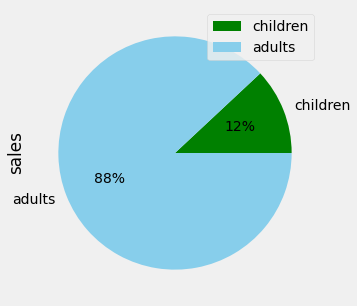

In [5]:
df_age = pd.DataFrame({'sales': [children.sum(), adults.sum()]}, #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
                  index=['children', 'adults'])
plot = df_age.plot.pie(y='sales', colors=["green","skyblue"], autopct='%1.0f%%', figsize=(5, 5)) #labels=df_age.index

Since we are going to perform statistical tests of the differences between the age and gender groups, it is more appropriate to use box plots.

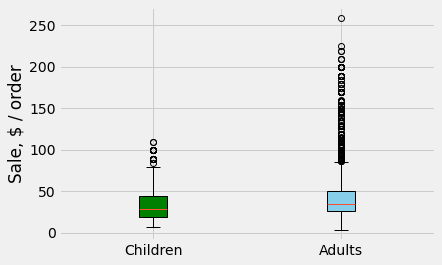

In [6]:
boxplot = plt.boxplot([children, adults], patch_artist=True);
colors=["green","skyblue"]
for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
plt.xticks([1,2], ["Children","Adults"])
plt.ylabel("Sale, $ / order")
plt.show() #https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

### Unpaired T-test
To test if the mean values of two different groups are significantly different, use two-sample t-test. This test uses the sample means from two groups and derives the conclusion for the unknown population’s means from which two groups are drawn.

In [7]:
st.ttest_ind(a=kids, b=adults)

Ttest_indResult(statistic=-5.432827006151113, pvalue=5.753429982438798e-08)

Since the p-value is much less than the conventionally used significance threshold 0.05, we confidently conclude that the two means are significantly different.

## Q2. Sales by Gender 

In [8]:
print("\t  Total sales")
print(f"females = ${round(females.sum(), 2)}")
print(f"males =\t  ${round(males.sum(), 2)}")
print(f"unisex =  ${round(unisex.sum(), 2)}")

	  Total sales
females = $150534.43
males =	  $117890.27
unisex =  $23611.03


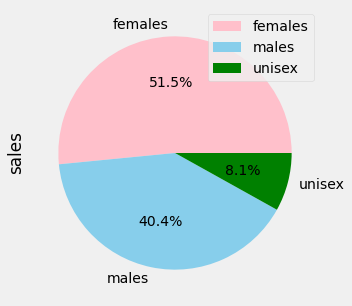

In [9]:
df_gender = pd.DataFrame({'sales': [females.sum(), males.sum(), unisex.sum()]}, #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
                  index=['females', 'males', 'unisex'])
plot = df_gender.plot.pie(y='sales', colors=["pink","skyblue","green"], autopct='%1.1f%%', figsize=(5, 5)) #labels=df_age.index

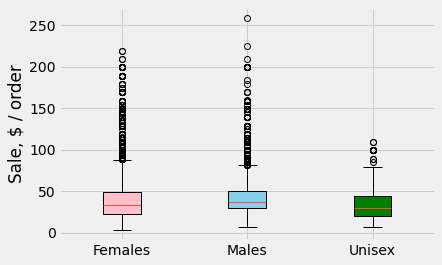

In [10]:
boxplot = plt.boxplot([females, males, unisex], patch_artist=True);
colors=["pink","skyblue","green"]
for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
plt.xticks([1,2,3], ["Females","Males","Unisex"])
plt.ylabel("Sale, $ / order")
plt.show()

### One-way ANOVA Test
To test difference of means between three or more groups, use ANOVA test. When there is only one independent variable, one-way ANOVA is used. ANOVA tests non-specific null hypothesis - all group means are equal, which is further followed by post-hoc test to see individual group differences.

In [11]:
# stats.f_oneway functions takes the groups as input and returns ANOVA F and p value. https://www.reneshbedre.com/blog/anova.html
fvalue, pvalue = st.f_oneway(females, males, unisex)
print(f"F = {fvalue}, p = {pvalue}")

F = 29.915772681680856, p = 1.15796254141502e-13


Since the p-value is much less than 0.05, we confidently conclude that there is at least one pair of significantly different means. Which pairs are different can be determined by pairwise tests, such as Tukey test. 

In [12]:
# perform multiple pairwise comparison (Tukey HSD)
# Recode gender/age group into gender
groups = np.array([])
for i in df1.index[:]:
    gender = i[0]
    if (gender == 'BOYS') | (gender == 'MENS'):
        gender = 'male'
    elif (gender == 'GIRLS') | (gender == 'WOMENS'):
        gender = 'female'
    else:
        gender = 'unisex'
    groups = np.append(groups, gender)
#m_comp = pairwise_tukeyhsd(endog=[females.mean(), males.mean(), unisex.mean()], groups=[females, males, unisex], alpha=0.05)
m_comp = pairwise_tukeyhsd(endog=df1.values, groups=groups, alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
female   male     2.76 0.001   1.0337  4.4862   True
female unisex  -6.7262 0.001  -9.5575 -3.8949   True
  male unisex  -9.4861 0.001 -12.3968 -6.5755   True
----------------------------------------------------


All three pairs of apparel genders have significantly different mean sale amounts.

## All gender/age categories

In [13]:
print("\t\tTotal sales")
print(f"womens =\t${round(womens.sum(), 2)}")
print(f"mens =\t\t${round(mens.sum(), 2)}")
print(f"kids =\t\t${round(kids.sum(), 2)}")
print(f"girls =\t\t${round(girls.sum(), 2)}")
print(f"toddlers =\t${round(toddlers.sum(), 2)}")
print(f"boys =\t\t${round(boys.sum(), 2)}")
print(f"unisex =\t${round(unisex_ga.sum(), 2)}")

		Total sales
womens =	$142500.44
mens =		$114335.37
kids =		$16668.39
girls =		$8034.0
toddlers =	$6666.79
boys =		$3554.9
unisex =	$275.85


For more than 5 categories, a bar chart is preferable. 

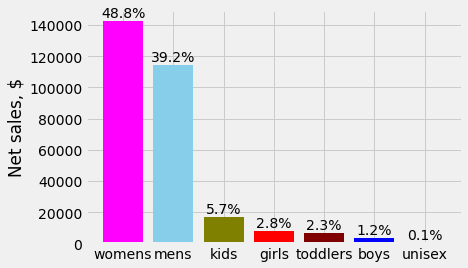

In [14]:
plt.bar(x=np.arange(1,7+1), height=[womens.sum(),mens.sum(),kids.sum(),girls.sum(),toddlers.sum(),boys.sum(),unisex_ga.sum()],
        color=["magenta","skyblue","olive","red","maroon","blue","green"])
plt.xticks(np.arange(1,7+1), ["womens","mens","kids","girls","toddlers","boys","unisex"])
plt.ylabel("Net sales, $")

# Add %
sales_net = np.sum(df1)
spacing = 2500
for i, category in enumerate([womens,mens,kids,girls,toddlers,boys,unisex_ga]): # manual sorting
    pct = round(category.sum()/sales_net*100, 1)
    plt.text(i+1, category.sum()+spacing, str(pct)+'%', horizontalalignment='center')
plt.show()

## Q3. Return by Color Patterns
What color patterns are there?

In [15]:
print( df['COLOR_PATTERN_DESC'].unique() )

['Solid' 'Color Block' '0 Multi for Pricing' 'Print' 'Multi Color' 'Motif'
 'Stripe' 'Two Tone' 'Plaid' 'Not Applicable' 'Camouflage' 'Floral'
 'Polka Dot' 'Check' 'Pattern' 'Tattersall' 'Chest Stripe'
 'Regimental Stripe' 'Multi Stripe' 'Windowpane' 'Awning Stripe'
 'Herringbone']


What are the return proportions for different color patterns?

In [16]:
# Returns by color patterns
df3 = df.groupby(['COLOR_PATTERN_DESC','ORD_ID'])['return'].mean()
df3

COLOR_PATTERN_DESC   ORD_ID      
0 Multi for Pricing  11382833        0.0
                     11840492        0.0
                     12370807        0.8
                     20791118        0.0
                     20883417        0.0
                                    ... 
Two Tone             900462000000    0.0
                     956217000000    0.0
Windowpane           10093841150     0.0
                     421496000000    0.0
                     807094000000    0.0
Name: return, Length: 7147, dtype: float64

In [17]:
df_return = pd.DataFrame(columns=['Color pattern', 'Mean return'])
for color_pattern in df['COLOR_PATTERN_DESC'].unique():
    mr = np.mean(df3[color_pattern]) # return proportion
    df_return = df_return.append({'Color pattern':color_pattern, 'Mean return':mr}, ignore_index=True)
df_return.set_index('Color pattern', inplace=True)
df_return.sort_values(by=['Mean return'], ascending=False, inplace=True) # sort by descending return proportion
df_return

,Mean return
Color pattern,
Regimental Stripe,0.333333
Chest Stripe,0.250000
Multi Color,0.163232
Color Block,0.150383
Floral,0.150000
Stripe,0.134529
Solid,0.128521
Two Tone,0.126866
Plaid,0.123596


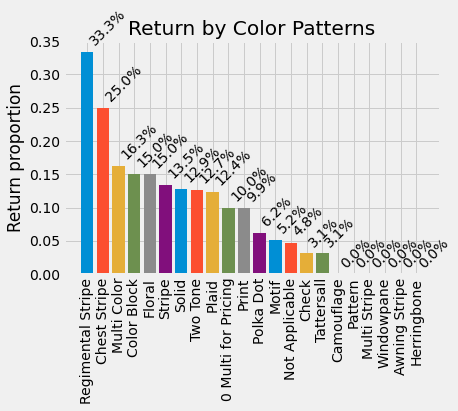

In [18]:
spacing = 0.01
for i, color_pattern in enumerate(df_return.index):
    h = df_return.iloc[i,0]
    plt.bar(x=i, height=h)
    plt.text(i, h+spacing, str(round(h*100,1))+'%', horizontalalignment='left', rotation=45)
plt.xticks(np.arange(0,len(df_return)), list([df_return.index][0]), rotation=90)
plt.ylabel("Return proportion")
plt.title("Return by Color Patterns")
plt.show()

## Q4. Compare the mean monthly sales by product genders (girls and boys) and color patterns

In [19]:
# Select boys and girls, and relevant columns
df4 = df.loc[ (df['PRODUCT_GENDER'] == 'GIRLS') | (df['PRODUCT_GENDER'] == 'BOYS'), ['PRODUCT_GENDER','COLOR_PATTERN_DESC','order_date','PROD_SELL_PRC']]
df4['month'] = df4.order_date.apply(lambda x: int(x.strftime('%Y-%m-%d')[5:6+1])) # month from timestamp
df4.drop('order_date', axis=1, inplace=True)
df4 = df4.groupby(by=['PRODUCT_GENDER','COLOR_PATTERN_DESC','month']).mean()
df4 = df4.reset_index()
display(df4.head()); display(df4.tail())

,PRODUCT_GENDER,COLOR_PATTERN_DESC,month,PROD_SELL_PRC
0,BOYS,0 Multi for Pricing,1,24.000000
1,BOYS,0 Multi for Pricing,5,16.250000
2,BOYS,0 Multi for Pricing,8,19.500000
3,BOYS,0 Multi for Pricing,9,18.833333
4,BOYS,0 Multi for Pricing,10,22.000000


,PRODUCT_GENDER,COLOR_PATTERN_DESC,month,PROD_SELL_PRC
102,GIRLS,Stripe,9,24.25
103,GIRLS,Stripe,12,14.99
104,GIRLS,Two Tone,4,22.50
105,GIRLS,Two Tone,5,22.50
106,GIRLS,Two Tone,7,16.00


In [20]:
#perform two-way ANOVA
model = ols('PROD_SELL_PRC ~ C(PRODUCT_GENDER) + C(COLOR_PATTERN_DESC) + C(PRODUCT_GENDER):C(COLOR_PATTERN_DESC)', data=df4).fit()
sm.stats.anova_lm(model, typ=2)

C:\Programs\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 8
  warnings.warn('covariance of constraints does not have full '
C:\Programs\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 10
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(PRODUCT_GENDER),129.077045,1.0,1.923084,1.691013e-01
C(COLOR_PATTERN_DESC),29476.178157,11.0,39.923414,8.387377e-26
C(PRODUCT_GENDER):C(COLOR_PATTERN_DESC),1130.326163,11.0,1.530947,1.422702e-01
Residual,5772.304879,86.0,NaN,NaN


Among the p-values shown in the right column, only the one for 'COLOR_PATTERN_DESC' is below 0.05. Therefore, the mean monthly sales significantly differ by color patterns, but there is no significant dependence on the product gender (boys or girls) and no interaction effect between the color pattern and product gender.

### Visualization types and their use
Reminder about types of plots and when to use them.

## Summary of Key Findings

* Comparison of sales by age

This retailer is primarily an adult clothing retailer with 85% of transactions and 88% of dollars coming from adult sizes; Children's clothing appears to be a relative afterthought. As such, it appears that they are missing an opportunity in this space. As an industry norm, children's clothing is, at least, as expensive as adult clothing, while at this retailer they are priced 30-36% lower. If this retailer followed the industry norm, children's clothing would be priced approximately $10-15 higher than they are currently priced and this could potentially give a 2% increase in revenue.

* Comparison of sales by gender and age

Expectedly, majority of the net sales are from females' apparels (56%). The share of sales from girls' (2.8%) and boys' (1.2%) apparels is surprisingly small. Definitely, it would be good to increase these shares to make this retailer more attractive to parents, which would also drive up adult product sales.

* Comparison of returns by color pattern

Apparels with the following color patterns were never returned: 'Camouflage', 'Pattern', 'Multi Stripe', 'Windowpane', 'Awning Stripe', 'Herringbone'.

## Remaining and Arising Questions
5. Compare sale amount by purchase channel and high/low discount (discount higher than 6.5% is high and is low otherwise). Requires two-way ANOVA.
6. Identify unusual and influential data. Requires outlier detection.
- Is there another primary factor responsible for returns?
- How soon customers make their first purchase, and how to make it faster?